# SQL

## Translating SQL WHERE clauses

Suppose to achieve the following task: 
*find all the employee that has a POLICE job title and had an ANNUAL SALARY between 70000 to 75000 dollars*. It can be done with the following SQL query:

In [ ]:
SELECT *
FROM employee
WHERE 'JOB TITLE' IN ('POLICE')
AND 'EMPLOYEE ANNUAL SALARY' BETWEEN 70000 AND 75000

In [1]:
import pandas as pd
import numpy as np

In [39]:
emp = pd.read_csv('data/employees.csv')
emp.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00


Let's remove **$** character from *EMPLOYEE ANNUAL SALARY* and *ESTIMATED ANNUAL SALARY MINUS FURLOUGHS* columns and then convert the type of those columns from string to int

In [40]:
emp['EMPLOYEE ANNUAL SALARY'] = emp['EMPLOYEE ANNUAL SALARY'].map(lambda x: x.lstrip('$'))
emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'].map(lambda x: x.lstrip('$'))
emp['EMPLOYEE ANNUAL SALARY'] = pd.to_numeric(emp['EMPLOYEE ANNUAL SALARY'])
emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'] = pd.to_numeric(emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'])
type(emp['EMPLOYEE ANNUAL SALARY'][0])
type(emp['ESTIMATED ANNUAL SALARY MINUS FURLOUGHS'][0])

numpy.float64

In [42]:
emp.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0


In [47]:
emp.DEPARTMENT.value_counts().head()

POLICE           14147
FIRE              5085
STREETS & SAN     2193
WATER MGMNT       1834
OEMC              1381
Name: DEPARTMENT, dtype: int64

In [46]:
emp['EMPLOYEE ANNUAL SALARY'].describe()

count     34218.000000
mean      73828.763341
std       22778.636848
min           1.000000
25%       67224.000000
50%       77238.000000
75%       84032.000000
max      260004.000000
Name: EMPLOYEE ANNUAL SALARY, dtype: float64

The method **isin()** tests the equality of one or many values. It is like **IN** SQL operator

In [88]:
police = ['WATER RATE TAKER']
police_job_title_criteria = emp['JOB TITLE'].isin(police)
annual_salary_criteria = (emp['EMPLOYEE ANNUAL SALARY'] >= 70000) & (emp['EMPLOYEE ANNUAL SALARY'] <= 75000)

After this, we combine all the boolean series together using the logic **AND** operator

In [89]:
final_criteria = police_job_title_criteria & annual_salary_criteria

Finally, use the boolean indexing to select only the rows that meet the final criteria

In [90]:
select_columns = ['NAME', 'JOB TITLE', 'DEPARTMENT', 'EMPLOYEE ANNUAL SALARY']
emp.loc[final_criteria, select_columns]

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY
622,"ALVAREZ, LOUIS D",WATER RATE TAKER,WATER MGMNT,73848.0
2410,"BLANKUS, RONALD E",WATER RATE TAKER,WATER MGMNT,73848.0
3338,"BROWN, SHARON L",WATER RATE TAKER,WATER MGMNT,70464.0
11547,"GREENWOOD, JESSIE M",WATER RATE TAKER,WATER MGMNT,70464.0
15838,"KHAN, INAYAT U",WATER RATE TAKER,WATER MGMNT,70464.0
16289,"KORDOWSKI, ANTHONY",WATER RATE TAKER,WATER MGMNT,70464.0
28312,"SIMMONS, RENNIE",WATER RATE TAKER,WATER MGMNT,73848.0
28360,"SIMS, DEMETRIUS",WATER RATE TAKER,WATER MGMNT,73848.0
30403,"THOMAS, HOWARD",WATER RATE TAKER,WATER MGMNT,70464.0


## Determining the normality of stock market returns

**parse_dates=** is a function to use for converting a sequence of string columns to an array of datetime instances

In [104]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


Next, create a Series by selecting only the *Close* price and then use the **pct_change()** method to get the daily rate of return. The *pct_change()* method calculate the percentage change between the current element and previous element. This transform the Close prices into daily percentage returns

In [105]:
amzn_daily_return = amzan['Close'].pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

Note that the first element is NaN as it does not have a previous price. Following this, drop the missing value and  plot an histogram of the returns to visually inspect the distribution

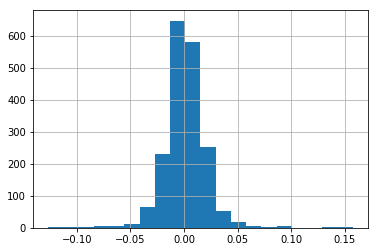

In [110]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

Now we have to figure out if this histogram is normal. Normal distributions approximately follow the 68-95-99.7 rule. Here we calculate that to see if is this the case

For this, we need mean and standard deviation:

In [111]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

Now, calculate the absolute value of the **z-score** for each observation. The *z-score* is the number of standard deviation away from the mean:
$$Z = \frac{X - \mu}{\sigma} $$

In [115]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

Lastly, we need to find the percentage of returns that are in **one (68%)**, **two (95%)** or **three (99.7%)** standard deviations

In [117]:
percentages = [abs_z_score.lt(i).mean() for i in range(1, 4)]
print('{:.3f} fall within 1 standard deviation. '
     '{:.3f} within 2 and {:.3f} within 3 '.format(*percentages))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3 


As it can be seen, the percentages deviate greatly from the rule and we can conclude that Amazon daily stock returns do not follow a normal distribution.

In [126]:
s = pd.Series([1, 2, 3])
s.lt(2).mean()

0.3333333333333333

In [129]:
percentages

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]